In [245]:
from limits import LimitFigure, ara_energies, ara_available, ara_projected
import importlib
import limits
importlib.reload(limits)

<module 'limits' from '/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/plotting/limits/limits.py'>

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x2ba01f161f98> has a label of '_collection0' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2ba024099898> has a label of '_line1' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


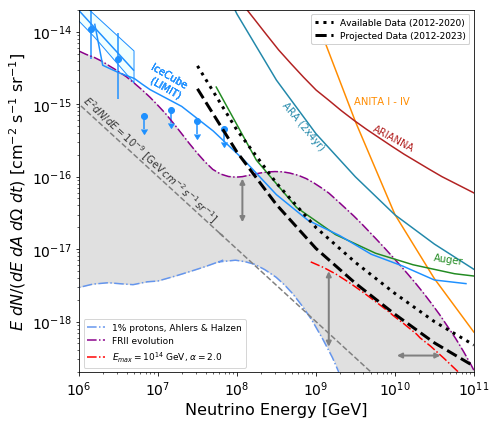

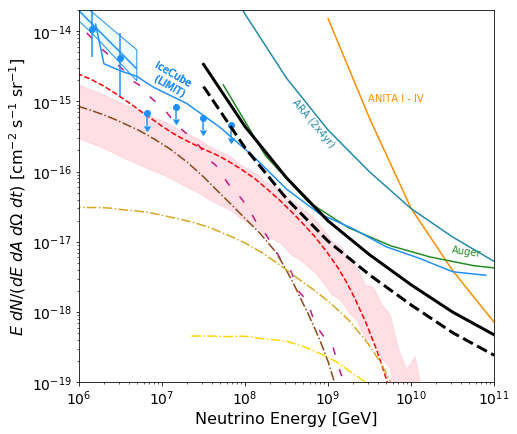

In [246]:
figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(2e-19, 2e-14), font_size=16, tick_size=14)
# figure.build_base_plot('ara',models = ['ahlers_1','ahlers_100','batista','batista_low_z','van_vliet2019', 'van_vliet2019_Elow', 'wittkowski_off','wittkowski','van_vliet2019_hard','van_vliet2019_soft','diagonal','kotera_FRII','vanvliet19_highE_hard','kotera'])
figure.build_base_plot('ara',models = ['ahlers_1','diagonal','kotera_FRII','vanvliet19_highE_hard','van_vliet2019'])
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle="dotted",
                label='Available Data (2012-2020)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='dashed',
                label='Projected Data (2012-2023)')
figure.show(legend_size=9, save_name='e1_sensitivity_plot_ara2019.pdf')

figure = LimitFigure(e_power=1, xlims=(1e6, 1e11), ylims=(1e-19, 2e-14), font_size=16, tick_size=14)
figure.build_base_plot('ara_src')
figure.add_limit('ARA', ara_energies, ara_available*0.9,
                stations=2.44, years=1, color='black', linestyle=None,
                label='Available Data (2012-2020)')
figure.add_limit('ARA', ara_energies, ara_projected*0.9,
                stations=2.44, years=1, color='black', linestyle='--',
                label='Projected Data (2012-2023)')

# figure.title("Trigger Level Sensitivities")
# figure.show(legend_size=8, save_name='e1_source_plot_ara2019.pdf')

  # Neutrinos per year  

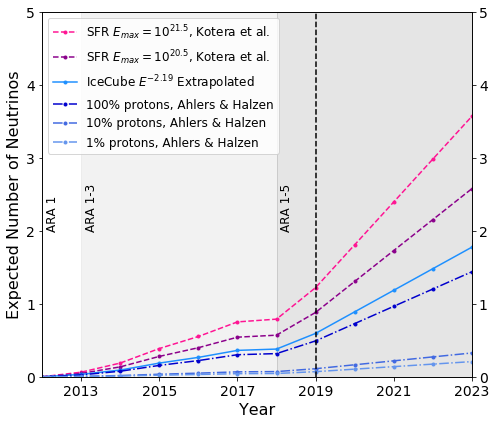

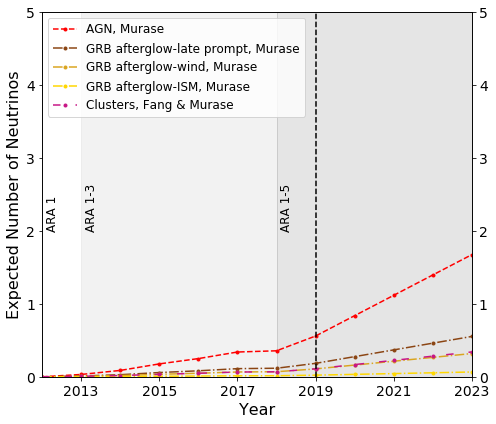

In [378]:
import neutrino_plots
from limits import (LimitFigure, count_neutrinos, ara_energies,
                    ara_100m, ara_200m, ara_200mpa)

fluxes = {
        "SFR $E_{max}=10^{21.5}$, Kotera et al.": neutrino_plots.kotera_high_e_flux,
        "SFR $E_{max}=10^{20.5}$, Kotera et al.": neutrino_plots.kotera_sfr_flux,
        "IceCube $E^{-2.19}$ Extrapolated": lambda e: LimitFigure._i3_nu_fit(e, slope=-2.19, offset=1.01),
        "100% protons, Ahlers & Halzen": neutrino_plots.ahlers_100_flux,
        "10% protons, Ahlers & Halzen": neutrino_plots.ahlers_10_flux,
        "1% protons, Ahlers & Halzen": neutrino_plots.ahlers_1_flux,
    }

styles = {
    "SFR $E_{max}=10^{21.5}$, Kotera et al.": "deeppink.--",
    "SFR $E_{max}=10^{20.5}$, Kotera et al.": "darkmagenta.--",
    "IceCube $E^{-2.19}$ Extrapolated": "dodgerblue.-",
    "100% protons, Ahlers & Halzen": "mediumblue.-.",
    "10% protons, Ahlers & Halzen": "royalblue.-.",
    "1% protons, Ahlers & Halzen": "cornflowerblue.-.",
}

ara_by_year = [284*ara_100m/366, (217+233)*ara_200m/365, (124*ara_100m+(313+304)*ara_200m)/365,
               (345+250)*ara_200m/365, (127*ara_100m+(323+297)*ara_200m)/366, 137*ara_200m/365,
               (316*ara_100m+(303+316+313)*ara_200m+186*ara_200mpa)/365,
               ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa, ara_100m+3*ara_200m+ara_200mpa,ara_100m+3*ara_200m+ara_200mpa]

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"],
                           save_name='yearly_neutrinos_ara_fluxes_2019proposal.pdf',xlim=[2012,2023])



fluxes = {
    "AGN, Murase": neutrino_plots.murase_agn_flux,
    "GRB afterglow-late prompt, Murase": neutrino_plots.murase_grb_late_flux,
    "GRB afterglow-wind, Murase": neutrino_plots.murase_grb_wind_flux,
    "GRB afterglow-ISM, Murase": neutrino_plots.murase_grb_ism_flux,
    "Clusters, Fang & Murase": neutrino_plots.fang_cluster_flux,
}

styles = {
    "AGN, Murase": "red.--",
    "GRB afterglow-late prompt, Murase": "saddlebrown.-.",
    "GRB afterglow-wind, Murase": "goldenrod.-.",
    "GRB afterglow-ISM, Murase": "gold.-.",
    "Clusters, Fang & Murase": "mediumvioletred.&",
}

neutrino_plots.plot_neutrinos_by_year_ara(fluxes, ara_energies, ara_by_year, styles=styles,
                           years=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
                           stations=["ARA 1", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-3", "ARA 1-5"])#,
#                            save_name='yearly_neutrinos_ara_sources_2019proposal.pdf')